# 3. Real Life Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1

#### Useful Functions

In [2]:
def fillMissingValues(data: np.array):
    col_mean = np.array([0.0 for i in range(len(data[0]))])

    for i in range(len(col_mean)):
        col = data[:, i]
        temp = np.array([])
        for item in col:  # Get all valid values, put them in a temporary spot and average over them
            if not np.isnan(item):
                temp = np.append(temp, item)
        col_mean[i] = np.mean(temp)
        for j in range(len(col)):
            if np.isnan(col[j]):
                col[j] = col_mean[i]
        data[:, i] = col
    np.savetxt('./data/Dataset_completed.csv', data, delimiter=',')
    return data

#### Solution

In [3]:
# Load the data
data = np.genfromtxt('./data/Dataset_3.csv', delimiter=',')
# Remove non-predicitive features
data = np.delete(data, [0, 1, 2, 3, 4], 1)
data = fillMissingValues(data)

## Part 2
#### Useful Functions

In [4]:
def save_splits(data: np.array, splits: int):
    chunkSize = int(round(len(data) / splits))
    np.random.shuffle(data)
    for i in range(0, splits):
        test_start = chunkSize * i
        test_end = test_start + chunkSize
        if i == splits - 1:
            test_start -= 1
        test = data[test_start:test_end]
        train = np.vstack((data[:test_start], data[test_end:]))
        np.savetxt('./data/CandC-train%d.csv' % i, train, delimiter=',')
        np.savetxt('./data/CandC-test%d.csv' % i, test, delimiter=',')

In [5]:
def load_splits():
    train_0 = np.genfromtxt('./data/CandC-train0.csv', delimiter=',')
    train_1 = np.genfromtxt('./data/CandC-train1.csv', delimiter=',')
    train_2 = np.genfromtxt('./data/CandC-train2.csv', delimiter=',')
    train_3 = np.genfromtxt('./data/CandC-train3.csv', delimiter=',')
    train_4 = np.genfromtxt('./data/CandC-train4.csv', delimiter=',')
    test_0 = np.genfromtxt('./data/CandC-test0.csv', delimiter=',')
    test_1 = np.genfromtxt('./data/CandC-test1.csv', delimiter=',')
    test_2 = np.genfromtxt('./data/CandC-test2.csv', delimiter=',')
    test_3 = np.genfromtxt('./data/CandC-test3.csv', delimiter=',')
    test_4 = np.genfromtxt('./data/CandC-test4.csv', delimiter=',')
    test = np.array([test_0, test_1, test_2, test_3, test_4])
    train = np.array([train_0, train_1, train_2, train_3, train_4])
    return train, test

In [6]:
def calcW(x: np.ndarray, y: np.ndarray, degree: int, lamb=0):
    i = np.identity(degree + 1)
    w = np.linalg.inv((x.T.dot(x)) + (lamb * i)).dot((x.T.dot(y)))
    return w

#### Solution

In [7]:
# UNCOMMENT THIS LINE TO SAVE THE 80-20 SPLITS
# save_splits(data, 5)

# Put the split data into respective arrays
train, test = load_splits()
train_x = np.empty(shape=(len(train), len(train[0]), len(train[0][0]) - 1))
train_y = np.empty(shape=(len(train), len(train[0]), 1))
test_x = np.empty(shape=(len(test), len(test[0]), len(test[0][0]) - 1))
test_y = np.empty(shape=(len(test), len(test[0]), 1))

In [8]:
# Split the input and output of the data
for i in range(len(train)):
    train_x[i] = np.delete(train[i], len(train[i][0]) - 1, axis=1)
    train_y[i] = np.array(train[i][:, len(train[i][0]) - 1]).reshape(-1, 1)
for i in range(len(test)):
    test_x[i] = np.delete(test[i], len(test[i][0]) - 1, axis=1)
    test_y[i] = np.array(test[i][:, len(test[i][0]) - 1]).reshape(-1, 1)

In [17]:
# Add a column of 1's for the bias, for the input
new_train_x = np.empty(shape=(len(train_x), len(train_x[0]), len(train_x[0][0]) + 1))
new_test_x = np.empty(shape=(len(test_x), len(test_x[0]), len(test_x[0][0]) + 1))

# Calculate MSE against test data with no regularization 
mse_test_noreg = np.array([0.0 for i in range(5)])
S = len(train_x) # Number of datasets
N = len(train_x[0]) # Number of examples
P = len(train_x[0][0]) # Number of features

# Calculate MSE for each of 5 datasets
for i in range(S):
    ones_train = np.array([1.0 for k in range(len(train_x[i]))])
    ones_test = np.array([1.0 for k in range(len(test_x[i]))])
    new_train_x[i] = np.insert(train_x[i], 0, ones_train, axis=1)
    new_test_x[i] = np.insert(test_x[i], 0, ones_test, axis=1)
    W = calcW(new_train_x[i], train_y[i], P)
    print('Parameters of model %d' % (i+1))
    print(W)
    mse_test_noreg[i] = ((test_y[i] - new_test_x[i].dot(W)).T.dot(test_y[i] - new_test_x[i].dot(W))[0][0]) \
                        / len(new_test_x[i])
# Calculate the mean
mean_mse_test_noreg = np.mean(mse_test_noreg)
print('Mean Test MSE without regularization %.10f' % mean_mse_test_noreg)



Parameters of model 1
[[  1.25206121e+00]
 [ -3.05767619e-01]
 [ -3.43483421e-02]
 [  1.58477767e-01]
 [ -8.96030722e-02]
 [ -5.40218079e-02]
 [  3.19674468e-02]
 [  7.64994164e-02]
 [ -3.17174129e-01]
 [ -7.60101907e-02]
 [  3.78596084e-02]
 [  2.07763942e-01]
 [  2.16973199e-02]
 [ -3.82589499e-01]
 [ -1.59824490e-01]
 [  2.94199514e-02]
 [ -1.96775427e-01]
 [  1.27045247e-01]
 [  4.33780170e-03]
 [ -7.56182254e-02]
 [  4.96624770e-01]
 [  2.75347320e-01]
 [ -5.46529017e-01]
 [ -5.07941736e-02]
 [ -1.33331960e-02]
 [ -8.30640119e-04]
 [  3.39124286e-02]
 [  3.31648610e-02]
 [  1.93651492e-01]
 [ -1.97246885e-01]
 [ -5.22098318e-02]
 [ -5.16671985e-02]
 [  5.54022752e-02]
 [ -1.23366581e-02]
 [  2.51742126e-01]
 [ -5.01072121e-02]
 [ -9.08489759e-03]
 [  7.71439078e-02]
 [  9.58467332e-02]
 [  4.23571409e-01]
 [  2.25194394e-01]
 [  7.16131857e-03]
 [ -4.29249040e-01]
 [ -1.14809854e-01]
 [ -2.31107370e-02]
 [ -3.97970617e-01]
 [  1.72660929e-02]
 [ -2.18800551e-02]
 [  3.96659969e-02

## Part 3

#### Solution

In [19]:
# Add Ridge Regularization
MSE_reg = np.empty(shape=(2000, 7))

# Calculate seperately for each of the 5 datasets
for i in range(S):
    lamb = 0.0
    P = len(train_x[i][0])
    # Test for lambda values between 0 and 20 with 0.01 steps
    for j in range(2000):
        lamb += 0.01
        W_new = calcW(new_train_x[i], train_y[i], P, lamb)
        MSE_reg[j][0] = lamb
        MSE_reg[j][i + 1] = ((test_y[i] - new_test_x[i].dot(W_new)).T \
                             .dot(test_y[i] - new_test_x[i].dot(W_new))[0][0]) \
                            / len(new_test_x[i])

In [20]:
# Put the mean of each trial at the last column of the MSE_reg table (this is for test data)
# Table structure: [ Lambda | T1 MSE | T2 MSE | T3 MSE | T4 MSE | T5 MSE | Avg. MSE ]
for i in range(2000):
    MSE_reg[i][6] = np.mean(MSE_reg[i][1:6])
# Find the row where the mean MSE is minimum
# Extract it's lambda as best lambda and find the actual best mean MSE
bestRow = MSE_reg[np.where(MSE_reg[:, 6] == min(MSE_reg[:, 6]))][0]
bestLambda = bestRow[0]
bestMean = bestRow[6]

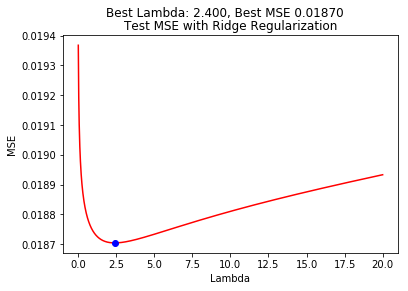

In [21]:
# Prepare for plot, create x and y points
xx = np.linspace(min(MSE_reg[:, 0]), max(MSE_reg[:, 0]), len(MSE_reg))
yy = MSE_reg[:, 6]

plt.figure(0)
plt.plot(xx, yy, color='r')
plt.plot(bestLambda, bestMean, 'o', color='b')
plt.title('Test MSE with Ridge Regularization')
plt.suptitle('Best Lambda: %.3f, Best MSE %.5f' % (bestLambda, bestMean))
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.show()

In [13]:
minW = np.empty(shape=(S, P + 1, 1))
for i in range(S):
    minW[i] = calcW(new_train_x[i], train_y[i], P, bestLambda)

### Feature Selection
#### Useful Functions

In [14]:
def inverseSet(data: np.array, cap: int):
    out = np.array([])
    for i in range(cap):
        if not np.isin(i, data):
            out = np.append(out, i)
    return out.astype(int)

#### Solution

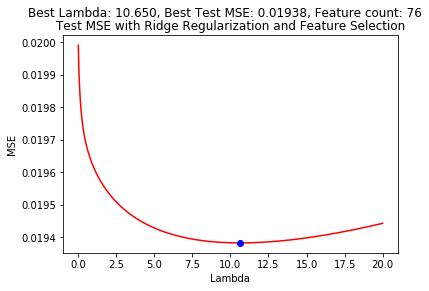

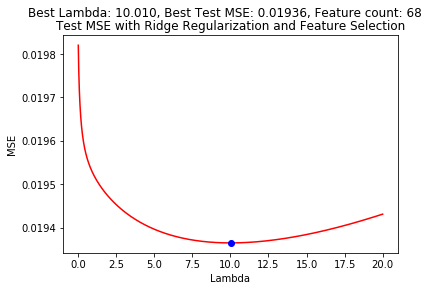

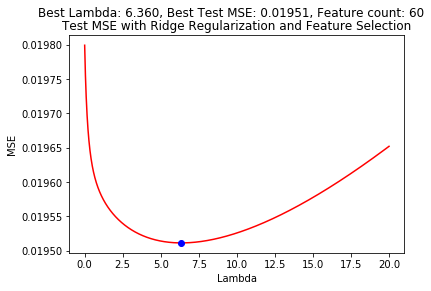

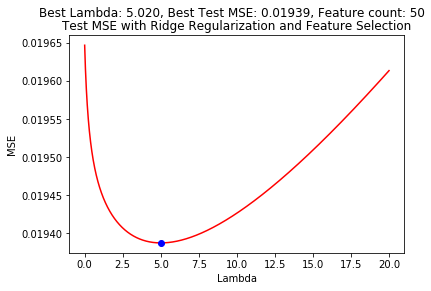

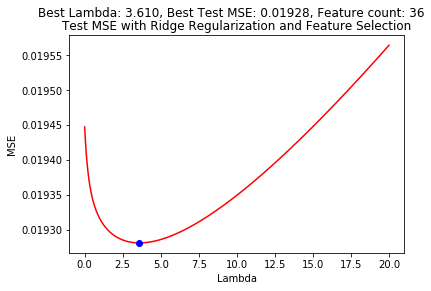

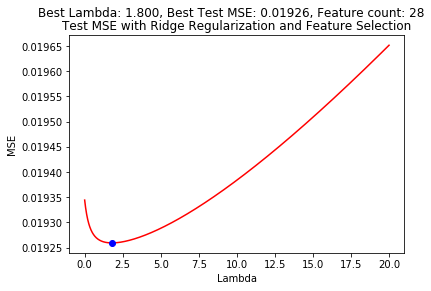

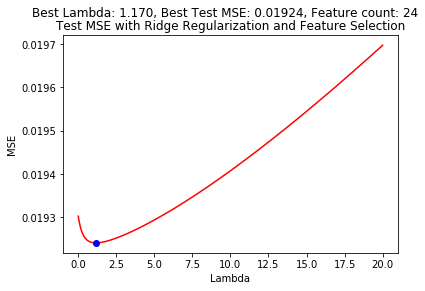

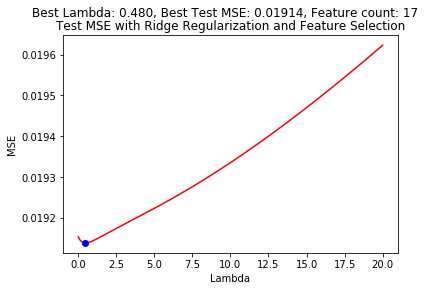

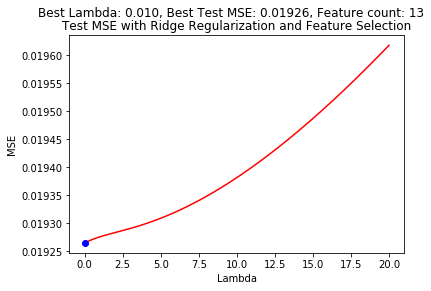

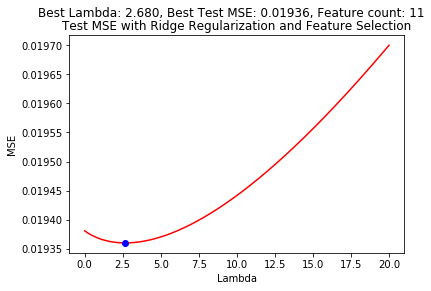

In [15]:
selectionThreshold = 0.0
bestFeatures = np.array([])
# Try with threshold values between 0.0 and 0.1
for i in range(10):
    selectionThreshold += 0.01
    trialFeatures = np.array([])
    MSE_reg_reduced = np.empty(shape=(2000, 7))
    # For each dataset, find the features to keep, however
    # Keep a union of the features to keep between the sets
    for j in range(S):
        trialFeatures = np.append(trialFeatures, np.where(minW[j] > selectionThreshold)[0])
        trialFeatures = np.unique(trialFeatures).astype(int)
        P = len(trialFeatures) - 1
        deleteFeatures = inverseSet(trialFeatures, len(new_train_x[j][0]))
        lamb = 0.0
        reduced_train_x = np.delete(new_train_x[j], deleteFeatures, 1)
        reduced_test_x = np.delete(new_test_x[j], deleteFeatures, 1)
        # Recalculate best lambda and MSE
        for k in range(2000):
            lamb += 0.01
            W_reduced = calcW(reduced_train_x, train_y[j], P, lamb)
            MSE_reg_reduced[k][0] = lamb
            MSE_reg_reduced[k][j + 1] = ((test_y[j] - reduced_test_x.dot(W_reduced)).T
                                         .dot(test_y[j] - reduced_test_x.dot(W_reduced))) / len(reduced_test_x)
    for j in range(2000):
        MSE_reg_reduced[j][6] = np.mean(MSE_reg_reduced[j][1:6])
    trialRow_reduced = MSE_reg_reduced[np.where(MSE_reg_reduced[:, 6] == min(MSE_reg_reduced[:, 6]))][0]
    trialLambda_reduced = trialRow_reduced[0]
    trialMean = trialRow_reduced[6]

    xx = np.linspace(min(MSE_reg_reduced[:, 0]), max(MSE_reg_reduced[:, 0]), len(MSE_reg_reduced))
    yy = MSE_reg_reduced[:, 6]

    # Plot
    plt.figure(i + 1)
    plt.plot(xx, yy, color='r')
    plt.plot(trialLambda_reduced, trialMean, 'o', color='b')
    plt.title('Test MSE with Ridge Regularization and Feature Selection')
    plt.suptitle('Best Lambda: %.3f, Best Test MSE: %.5f, Feature count: %d' % (trialLambda_reduced, trialMean, P))
    plt.xlabel('Lambda')
    plt.ylabel('MSE')
    plt.show()